# Analyzing Google Play Store Data

The "Unveiling the Android App Market: Analyzing Google Play Store Data" project focuses on analyzing the Google Play Store app data to uncover market trends and insights. The project begins with cleaning and correcting the dataset to ensure accuracy. It then explores app distribution across various categories, examines key metrics such as ratings, size, popularity, and pricing trends, and conducts sentiment analysis to assess user reviews. Interactive visualizations are employed to enhance data interpretation, drawing on insights from the "Understanding Data Visualization" course.

## Importing Libraries and Loading Dataset

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Data Analytics\Sales_Inslight DA Project\apps.csv")

## Data Cleaning and Preparation

In [3]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Check for missing values
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [5]:
# Remove duplicates, if any
df.drop_duplicates(inplace=True)

In [6]:

# Convert 'Installs' to numeric
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [7]:

# Check data types
df.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Exploratory Data Analysis (EDA)

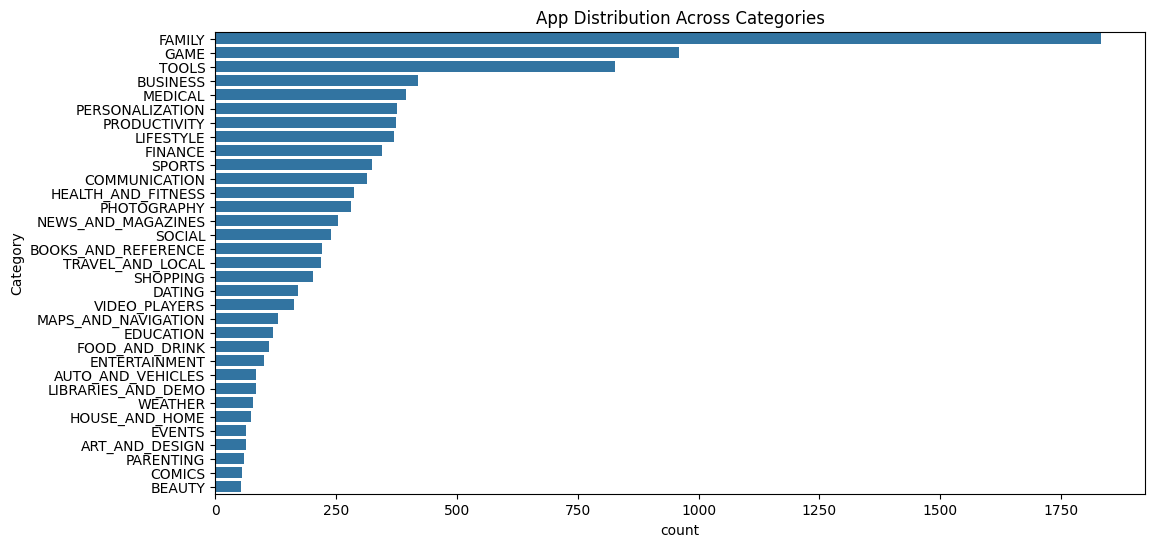

In [8]:
# Plot app distribution across categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('App Distribution Across Categories')
plt.show()


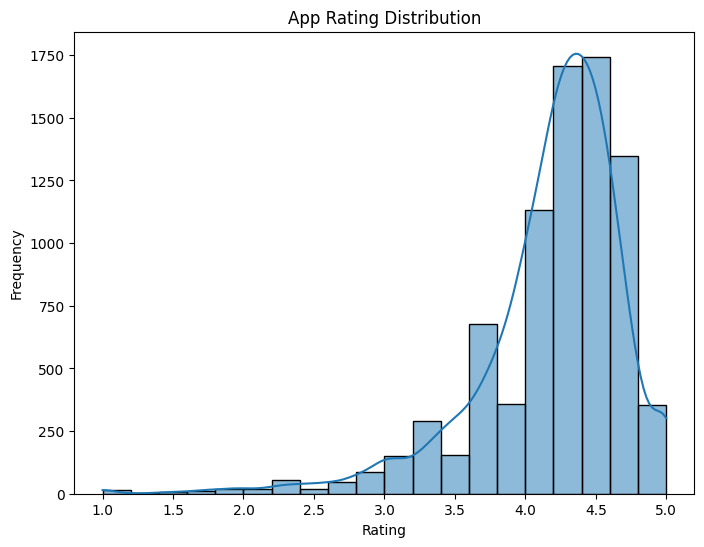

In [9]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('App Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


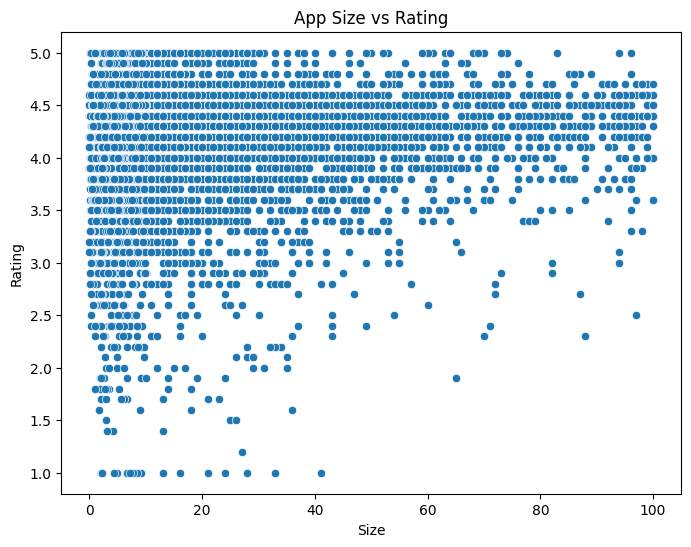

In [10]:

# Scatter plot: Size vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('App Size vs Rating')
plt.show()


## Extract Insights

In [11]:
# Insight 1: Average rating per category
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_rating)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          4.044595
TOOLS                  4.039554

In [12]:
# Insight 2: Correlation between app size and rating
correlation_size_rating = df[['Size', 'Rating']].corr()
print("\n\n Correlation between Size and Rating:", correlation_size_rating)




 Correlation between Size and Rating:             Size    Rating
Size    1.000000  0.063076
Rating  0.063076  1.000000


In [13]:

# Insight 3: Top 5 apps based on installs
top_apps = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head()
print("Top Apps", top_apps)

Top Apps                             App    Installs
300          WhatsApp Messenger  1000000000
152           Google Play Books  1000000000
1356             Subway Surfers  1000000000
2420  Maps - Navigate & Explore  1000000000
304                       Gmail  1000000000


# Conclusion

This project provides a comprehensive analysis of the Android app market by examining app distribution, user ratings, and pricing strategies. The sentiment analysis sheds light on user satisfaction, while interactive visualizations help present key findings in a more intuitive and impactful way. The project successfully highlights market dynamics, enabling better understanding of app performance and trends in the Google Play Store.